In [1]:
import numpy as np
import seaborn as sns

import ginsim
import biolqm
import maboss
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states
import pydot

import os

from tools import load_trajs, draw_graph_from_pandas, compute_circuits, compute_stg_counts

# Load models

In [5]:
path = "./Models/"

In [6]:
bnd_file = path + "CRCmodel_20230221.bnd"
cfg_file = path + "CRCmodel_20230221.cfg"

masim = maboss.load(bnd_file, cfg_file)

In [7]:
masim_biolqm = maboss.to_biolqm(masim)
masim_ginsim = biolqm.to_ginsim(masim_biolqm)
ginsim.show(masim_ginsim)

# Computing the stable states of the model
We compute the fixpoints (or stable states) of the model

- However, this functionality is implemented in `biolqm` a subpackage of GINsim. However, the new version of GINsim does not have the computing fixpoints function
- I don't really what happen to it though.
- Probably, I can email Aurelien ?

# MaBoSS simulation of the model
## WT condition

In [8]:
masim_allinputs = maboss.copy_and_update_parameters(masim, {'max_time':50})

## By default, all variables are external (in the cfg file: Node.is_internal = FALSE). 
## If the model is big, the computations may take a very long time.
## We advise to set as external, only the variables that are relevant for the analysis

## if you wish to put some values as internal (the ones that will not be used for the analysis), write (uncomment):
#for name in "ERK_1_2 MK2 p38 Wee1 BRAF CDK1 p21 TP53 Proliferation Senescence Apoptosis".split(' '):
#for name in "TAK1 PI3K MTORC2 CDC25A CDK4_6 S6 JNK AKT p38 p21".split(' '):
#     masim_allinputs.network[name].is_internal = True

masim_allinputs.network.set_output(masim.network.names)

masim_allinputs.network.set_istate('FGFR',[0.5,0.5])
masim_allinputs.network.set_istate('EGF',[0.5,0.5])
masim_allinputs.network.set_istate('TGFb',[0.5,0.5])
masim_allinputs.network.set_istate('TNF',[0.5,0.5])
masim_allinputs.network.set_istate('Wnt',[0.5,0.5])
masim_allinputs.network.set_istate('IL1R1',[0.5,0.5])
masim_allinputs.network.set_istate('IL6',[0.5,0.5])
masim_allinputs.network.set_istate('IFNA',[0.5,0.5])

masim_res = masim_allinputs.run()

node_trajectory = masim_res.get_nodes_probtraj()

Text(0.5, 1.0, 'NFkB signaling')

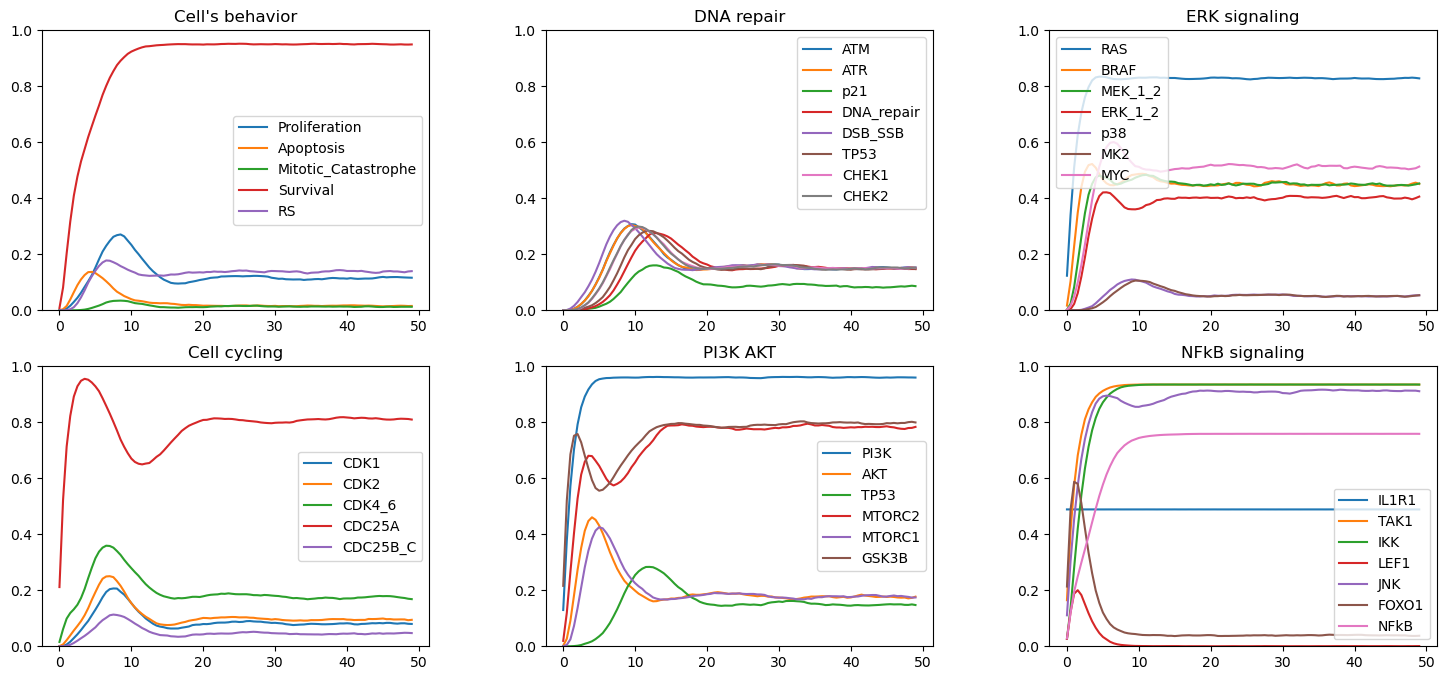

In [68]:
# Plot cell behavior
fig, axs = plt.subplots(2,3, figsize = (18,8), gridspec_kw={'wspace':0.3})

# Cell's behavior plot
features = ['Proliferation','Apoptosis','Mitotic_Catastrophe','Survival', 'RS']
axs[0,0].plot(node_trajectory[features], label = node_trajectory[features].columns)
axs[0,0].legend(loc = 'best')
axs[0,0].set_ylim(0,1)
axs[0,0].set_title("Cell's behavior")

# DNA repair process
features = ['ATM','ATR','p21','DNA_repair','DSB_SSB','TP53','CHEK1','CHEK2']
axs[0,1].plot(node_trajectory[features], label = node_trajectory[features].columns)
axs[0,1].legend(loc = 'best')
axs[0,1].set_ylim(0,1)
axs[0,1].set_title("DNA repair")

# ERK signaling
features = ['RAS','BRAF','MEK_1_2','ERK_1_2','p38','MK2','MYC']
axs[0,2].plot(node_trajectory[features], label = node_trajectory[features].columns)
axs[0,2].legend(loc = 'best')
axs[0,2].set_ylim(0,1)
axs[0,2].set_title("ERK signaling")

# Cell cycling process
features = ['CDK1','CDK2','CDK4_6','CDC25A','CDC25B_C']
axs[1,0].plot(node_trajectory[features], label = node_trajectory[features].columns)
axs[1,0].legend(loc = 'best')
axs[1,0].set_ylim(0,1)
axs[1,0].set_title("Cell cycling")

# AKT process
features = ['PI3K','AKT','TP53','MTORC2','MTORC1','GSK3B']
axs[1,1].plot(node_trajectory[features], label = node_trajectory[features].columns)
axs[1,1].legend(loc = 'best')
axs[1,1].set_ylim(0,1)
axs[1,1].set_title("PI3K AKT")

# ERK signaling
features = ['IL1R1','TAK1','IKK','LEF1','JNK','FOXO1','NFkB']
axs[1,2].plot(node_trajectory[features], label = node_trajectory[features].columns)
axs[1,2].legend(loc = 'best')
axs[1,2].set_ylim(0,1)
axs[1,2].set_title("NFkB signaling")


## CHEK1i conditions

In [73]:
masim_chek1i = maboss.copy_and_mutate(masim_allinputs, nodes = ["CHEK1","CHEK2"], mut = 'OFF')
masim_chek1i_res = masim_chek1i.run()
node_chek1i_trajectory = masim_chek1i_res.get_nodes_probtraj()

Text(0.5, 1.0, 'NFkB signaling')

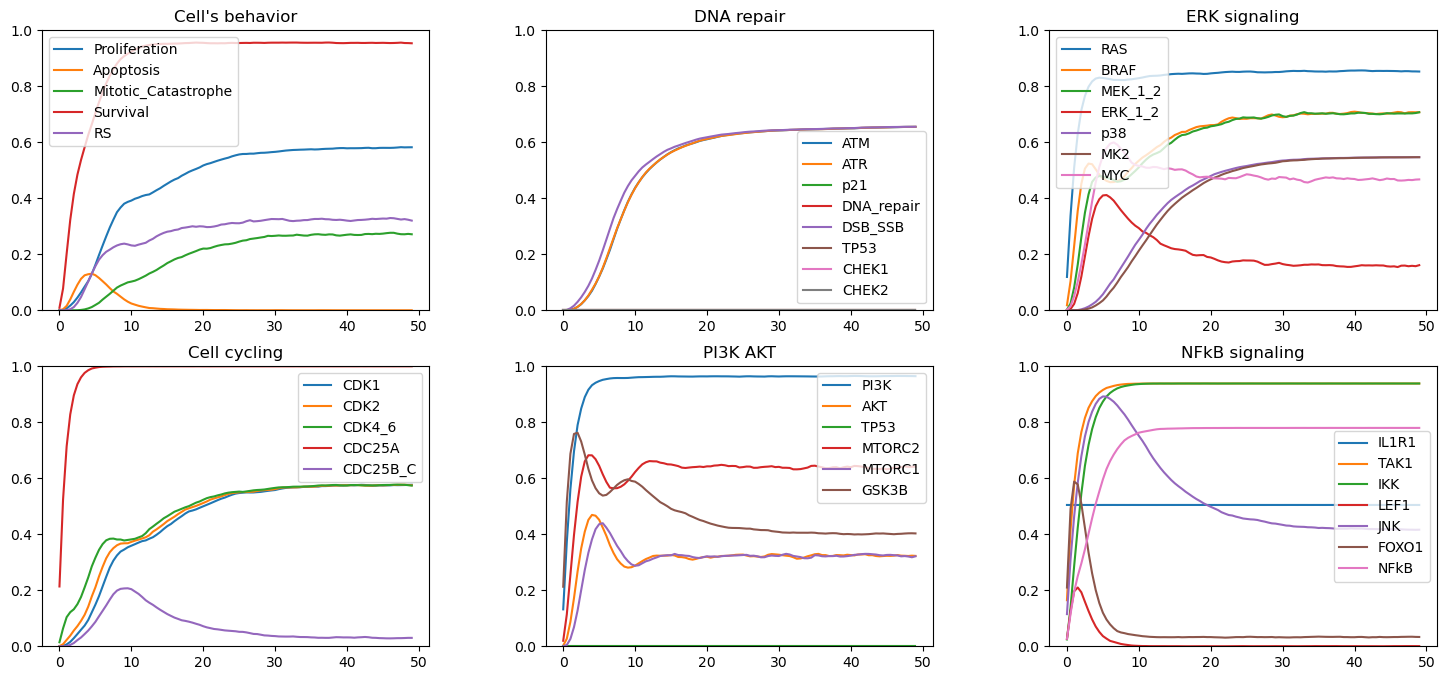

In [74]:
# Plot cell behavior
fig, axs = plt.subplots(2,3, figsize = (18,8), gridspec_kw={'wspace':0.3})

# Cell's behavior plot
features = ['Proliferation','Apoptosis','Mitotic_Catastrophe','Survival', 'RS']
axs[0,0].plot(node_chek1i_trajectory[features], label = node_chek1i_trajectory[features].columns)
axs[0,0].legend(loc = 'best')
axs[0,0].set_ylim(0,1)
axs[0,0].set_title("Cell's behavior")

# DNA repair process
features = ['ATM','ATR','p21','DNA_repair','DSB_SSB','TP53','CHEK1','CHEK2']
axs[0,1].plot(node_chek1i_trajectory[features], label = node_chek1i_trajectory[features].columns)
axs[0,1].legend(loc = 'best')
axs[0,1].set_ylim(0,1)
axs[0,1].set_title("DNA repair")

# ERK signaling
features = ['RAS','BRAF','MEK_1_2','ERK_1_2','p38','MK2','MYC']
axs[0,2].plot(node_chek1i_trajectory[features], label = node_chek1i_trajectory[features].columns)
axs[0,2].legend(loc = 'best')
axs[0,2].set_ylim(0,1)
axs[0,2].set_title("ERK signaling")

# Cell cycling process
features = ['CDK1','CDK2','CDK4_6','CDC25A','CDC25B_C']
axs[1,0].plot(node_chek1i_trajectory[features], label = node_chek1i_trajectory[features].columns)
axs[1,0].legend(loc = 'best')
axs[1,0].set_ylim(0,1)
axs[1,0].set_title("Cell cycling")

# AKT process
features = ['PI3K','AKT','TP53','MTORC2','MTORC1','GSK3B']
axs[1,1].plot(node_chek1i_trajectory[features], label = node_chek1i_trajectory[features].columns)
axs[1,1].legend(loc = 'best')
axs[1,1].set_ylim(0,1)
axs[1,1].set_title("PI3K AKT")

# ERK signaling
features = ['IL1R1','TAK1','IKK','LEF1','JNK','FOXO1','NFkB']
axs[1,2].plot(node_chek1i_trajectory[features], label = node_chek1i_trajectory[features].columns)
axs[1,2].legend(loc = 'best')
axs[1,2].set_ylim(0,1)
axs[1,2].set_title("NFkB signaling")